# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

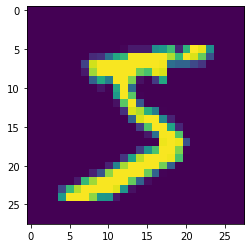

Label:  5


In [ ]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

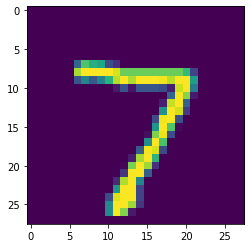

Label:  7


In [ ]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [ ]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


## Basic MLP model
- Naive MLP model without any alterations

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
165/165 [==============================] - 1s 7ms/step - loss: 2.4838 - accuracy: 0.0995 - val_loss: 2.4486 - val_accuracy: 0.0966
Epoch 2/100
165/165 [==============================] - 1s 5ms/step - loss: 2.4176 - accuracy: 0.0995 - val_loss: 2.3965 - val_accuracy: 0.0966
Epoch 3/100
165/165 [==============================] - 1s 5ms/step - loss: 2.3761 - accuracy: 0.0995 - val_loss: 2.3634 - val_accuracy: 0.0966
Epoch 4/100
165/165 [==============================] - 1s 5ms/step - loss: 2.3496 - accuracy: 0.0995 - val_loss: 2.3422 - val_accuracy: 0.0966
Epoch 5/100
165/165 [==============================] - 1s 5ms/step - loss: 2.3327 - accuracy: 0.0995 - val_loss: 2.3283 - val_accuracy: 0.0966
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 2.3217 - accuracy: 0.0997 - val_loss: 2.3193 - val_accuracy: 0.0970
Epoch 7/100
165/165 [==============================] - 1s 5ms/step - loss: 2.3145 - accuracy: 0.1019 - val_loss: 2.3135 - val_accuracy: 0.0989

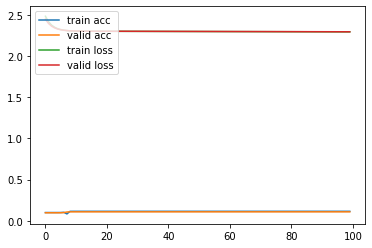

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.2944 - accuracy: 0.1135


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization
- Changing weight initialization scheme can sometimes improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [ ]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3656 - accuracy: 0.1143 - val_loss: 2.3063 - val_accuracy: 0.1079
Epoch 2/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3001 - accuracy: 0.1143 - val_loss: 2.2984 - val_accuracy: 0.1079
Epoch 3/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2958 - accuracy: 0.1143 - val_loss: 2.2955 - val_accuracy: 0.1079
Epoch 4/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2929 - accuracy: 0.1143 - val_loss: 2.2927 - val_accuracy: 0.1079
Epoch 5/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2902 - accuracy: 0.1143 - val_loss: 2.2900 - val_accuracy: 0.1079
Epoch 6/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2876 - accuracy: 0.1143 - val_loss: 2.2872 - val_accuracy: 0.1079
Epoch 7/100
1313/1313 [==============================] - 2s 2ms/step - loss: 2.2849 - accuracy: 0.1143 - val_loss: 2.2844 - val_ac

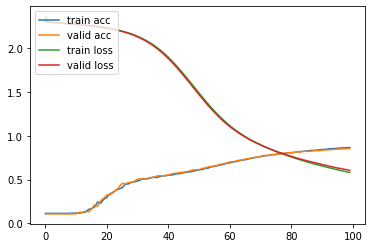

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.8625


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.862500011920929


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1128 - accuracy: 0.7314 - val_loss: 0.5504 - val_accuracy: 0.8466
Epoch 2/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4489 - accuracy: 0.8700 - val_loss: 0.4168 - val_accuracy: 0.8827
Epoch 3/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3434 - accuracy: 0.8988 - val_loss: 0.3719 - val_accuracy: 0.8918
Epoch 4/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2895 - accuracy: 0.9141 - val_loss: 0.3231 - val_accuracy: 0.9103
Epoch 5/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2528 - accuracy: 0.9248 - val_loss: 0.2951 - val_accuracy: 0.9153
Epoch 6/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2266 - accuracy: 0.9321 - val_loss: 0.2940 - val_accuracy: 0.9170
Epoch 7/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2094 - accuracy: 0.9368 - val_loss: 0.2848 - val_ac

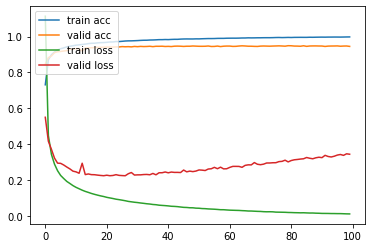

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9488


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9488000273704529


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

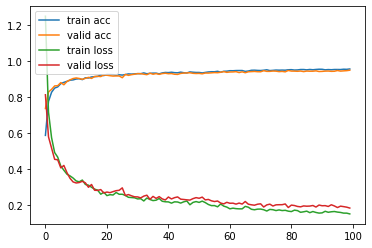

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9465


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9465000033378601


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

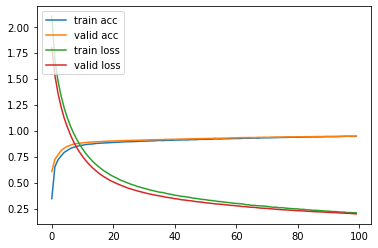

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9481


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9480999708175659


## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [ ]:
from keras.layers import Dropout

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

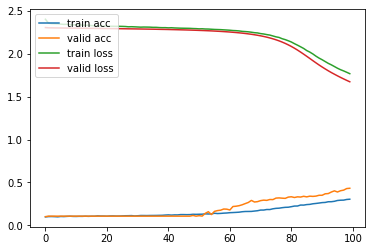

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.6782 - accuracy: 0.4227


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4226999878883362


## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRs1CBSEtpp5yj6SJ5K_nHd1FNfyEYa9KLjWfoMY_v7ARTq3tdpVw" style="width: 300px"/>

In [ ]:
import numpy as np

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [ ]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)]
                                , voting = 'soft')

In [ ]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3b1c1f9438>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3b1c1ce7b8>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f3b1c10d978>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [ ]:
y_pred = ensemble_clf.predict(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [ ]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9002


## Summary

Below table is a summary of evaluation results so far. It turns out that all methods improve the test performance over the MNIST dataset. Why don't we try them out altogether?

|Model           | Baseline  | Weight initialization  | Activation function        | Optimizer        | Batchnormalization  | Regularization   | Ensemble   |
|----------------|-------------|------------|-------------|-------------|------------|-----------|------------|
|Test Accuracy   | 0.1134     | 0.8625     | 0.9488      | 0.9465      | 0.9480     | 0.4226    | 0.9002     |

<br>
